In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
recipes = pd.read_csv('recipes.csv')
users = pd.read_csv('users.csv')

In [20]:
recipes.head(2)

,receita,nacionalidade,ingredientes,categoria,ocasião,tempo,dificuldade,calorias,açúcar,sódio,proteínas,carboidratos,feedback
0,Salada de Verão,Brasileira,"['Alface', 'Tomate', 'Cenoura', 'Pepino', 'Pim...",Vegetariano,Almoço,15,Fácil,100,5g,50mg,3g,15g,1
1,Frango Assado,Americana,"['Frango', 'Limão', 'Alho', 'Alecrim', 'Azeite']",Aves,Jantar,60,Médio,250,0g,200mg,30g,2g,1


In [21]:
users.head(2)

,id,sex,genre,age,height,weight,food_restrictions,exercise_days_per_week
0,1,Masculino,Masculino,28,175,75,['Nenhuma'],1
1,2,Feminino,Feminino,35,163,60,['Lactose'],4


In [22]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   receita        294 non-null    object
 1   nacionalidade  294 non-null    object
 2   ingredientes   294 non-null    object
 3   categoria      294 non-null    object
 4   ocasião        294 non-null    object
 5   tempo          294 non-null    int64 
 6   dificuldade    294 non-null    object
 7   calorias       294 non-null    int64 
 8   açúcar         294 non-null    object
 9   sódio          294 non-null    object
 10  proteínas      294 non-null    object
 11  carboidratos   294 non-null    object
 12  feedback       294 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 30.0+ KB


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      60 non-null     int64 
 1   sex                     60 non-null     object
 2   genre                   60 non-null     object
 3   age                     60 non-null     int64 
 4   height                  60 non-null     int64 
 5   weight                  60 non-null     int64 
 6   food_restrictions       60 non-null     object
 7   exercise_days_per_week  60 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.9+ KB


# EDA

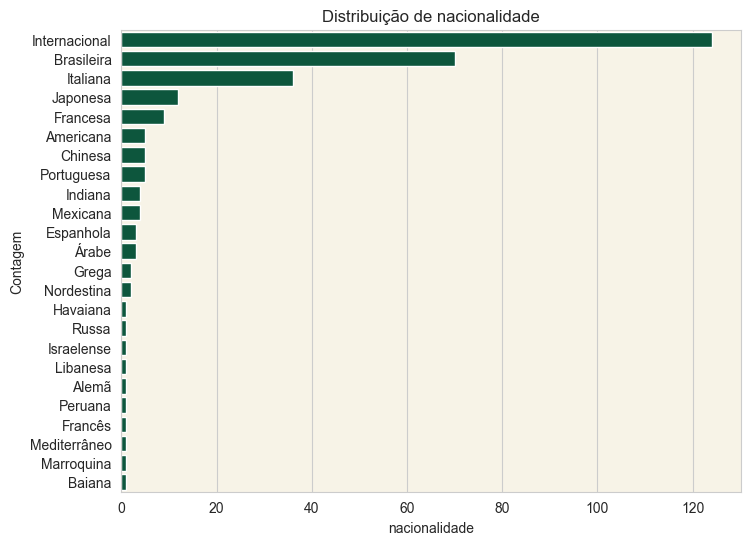

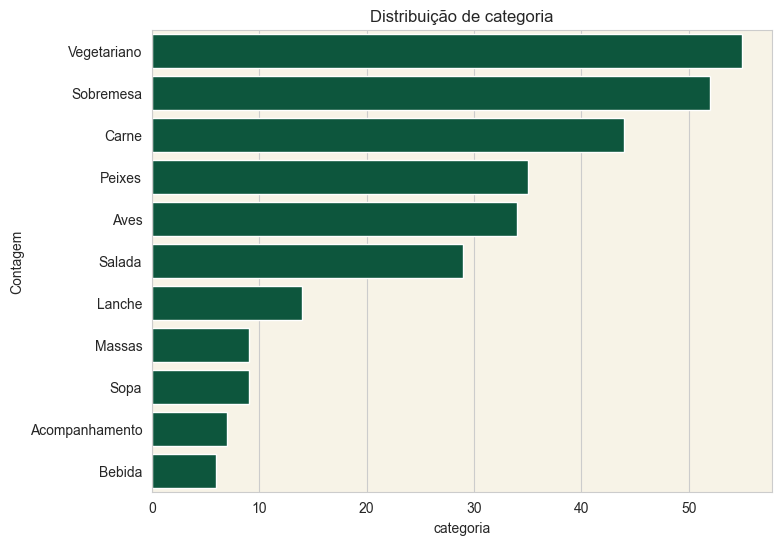

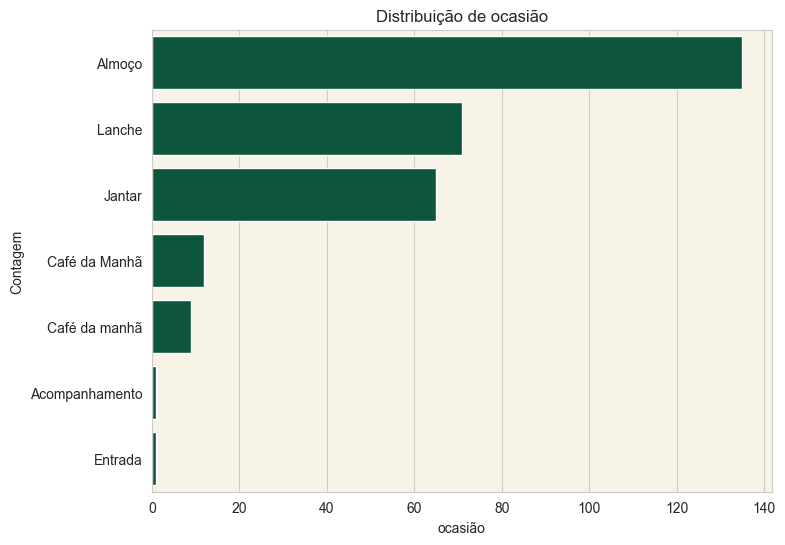

In [24]:
categorical_columns = ['nacionalidade', 'categoria', 'ocasião']
sns.set_style("whitegrid", {'axes.facecolor': '#f7f3e7'})

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=recipes, order=recipes[column].value_counts().index, orient='h', color="#016241")
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.show()


In [25]:
# remove 'g' from açúcar, proteínas, carboidratos and convert to int
recipes['açúcar'] = recipes['açúcar'].str.replace('g', '').astype(int)
recipes['proteínas'] = recipes['proteínas'].str.replace('g', '').astype(int)
recipes['carboidratos'] = recipes['carboidratos'].str.replace('g', '').astype(int)

# remove 'mg' from sódio and convert to int
recipes['sódio'] = recipes['sódio'].str.replace('mg', '').astype(int)

recipes.head(3)

,receita,nacionalidade,ingredientes,categoria,ocasião,tempo,dificuldade,calorias,açúcar,sódio,proteínas,carboidratos,feedback
0,Salada de Verão,Brasileira,"['Alface', 'Tomate', 'Cenoura', 'Pepino', 'Pim...",Vegetariano,Almoço,15,Fácil,100,5,50,3,15,1
1,Frango Assado,Americana,"['Frango', 'Limão', 'Alho', 'Alecrim', 'Azeite']",Aves,Jantar,60,Médio,250,0,200,30,2,1
2,Risoto de Cogumelos,Italiana,"['Arroz Arbóreo', 'Cogumelos', 'Cebola', 'Cald...",Vegetariano,Jantar,45,Médio,300,2,300,8,50,0


/var/folders/1l/3bx9mf_x0pqf0ghbg1csygrw0000gn/T/ipykernel_44119/4149947090.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recipes['ingredientes'] = recipes['ingredientes'].str.replace('[', '').str.replace(']', '')


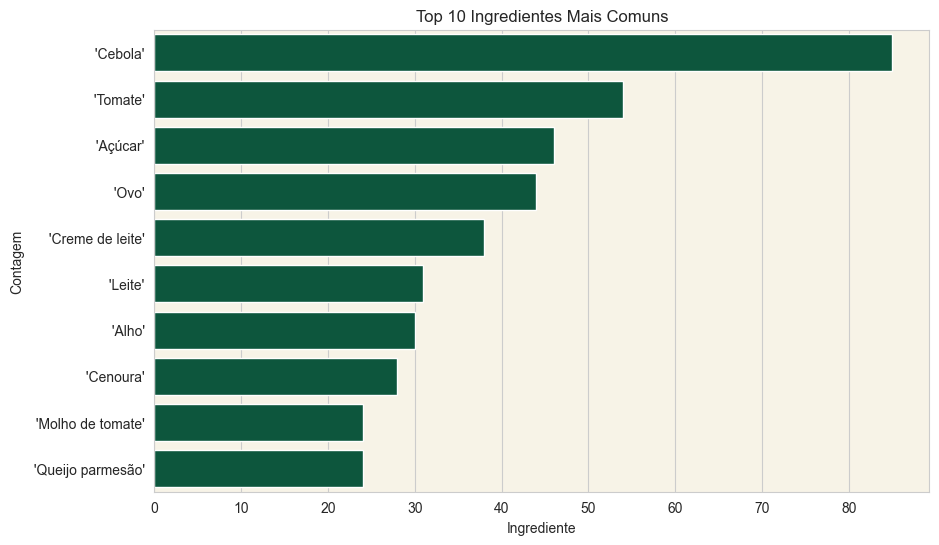

In [26]:
# Análise da distribuição de ingredientes (exemplo considerando 10 ingredientes mais comuns)
from collections import Counter

# remove '[' and ']' from ingredientes
recipes['ingredientes'] = recipes['ingredientes'].str.replace('[', '').str.replace(']', '')

# Converter a coluna de ingredientes para uma lista
ingredients_list = recipes['ingredientes'].str.split(',').sum()

# Contar a frequência dos ingredientes
ingredient_counter = Counter(ingredients_list)
common_ingredients = ingredient_counter.most_common(10)  # Obter os 10 ingredientes mais comuns

# Criar um gráfico de barras para os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(y=[ingredient[0] for ingredient in common_ingredients], x=[ingredient[1] for ingredient in common_ingredients], color="#016241", orient='h')
plt.title('Top 10 Ingredientes Mais Comuns')
plt.xlabel('Ingrediente')
plt.ylabel('Contagem')
plt.show()

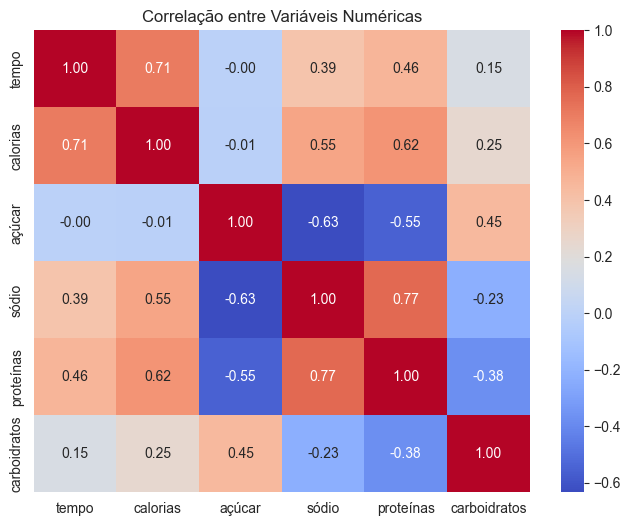

In [27]:
numeric_columns = recipes.drop('feedback', axis=1).select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(recipes[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Cluster

In [29]:
def imc_calc(peso, altura):
    return peso / ((altura / 100) ** 2)


users['imc'] = imc_calc(users['weight'], users['height'])
users.head(3)

,id,sex,genre,age,height,weight,food_restrictions,exercise_days_per_week,imc
0,1,Masculino,Masculino,28,175,75,['Nenhuma'],1,24.489796
1,2,Feminino,Feminino,35,163,60,['Lactose'],4,22.582709
2,3,Não binário,Outro,22,170,68,['Glúten'],1,23.529412


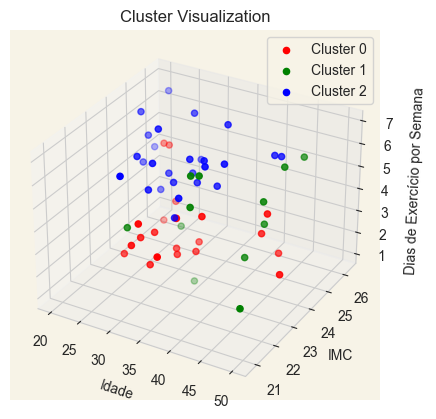

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
users_scaled = scaler.fit_transform(users[['age', 'imc', 'exercise_days_per_week']])
users_scaled = pd.DataFrame(users_scaled, columns=['exercise_days_per_week', 'age', 'imc'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(users_scaled)
users['cluster'] = kmeans.labels_

colors = ['r', 'g', 'b']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, color in enumerate(colors):
    cluster_data = users[users['cluster'] == i]
    ax.scatter(cluster_data['age'], cluster_data['imc'], cluster_data['exercise_days_per_week'], c=color, marker='o', label=f'Cluster {i}') 

    ax.set_xlabel('Idade')
    ax.set_ylabel('IMC')
    ax.set_zlabel('Dias de Exercício por Semana')

    ax.legend()

plt.title('Cluster Visualization')

plt.show()

In [31]:
users['perfil_usuario'] = users['cluster'].replace({0: 'Sedentário', 1: 'Saudável', 2: 'Atleta'})
users[['id', 'age', 'imc', 'exercise_days_per_week', 'cluster', 'perfil_usuario']].head(3)

,id,age,imc,exercise_days_per_week,cluster,perfil_usuario
0,1,28,24.489796,1,0,Sedentário
1,2,35,22.582709,4,1,Saudável
2,3,22,23.529412,1,0,Sedentário


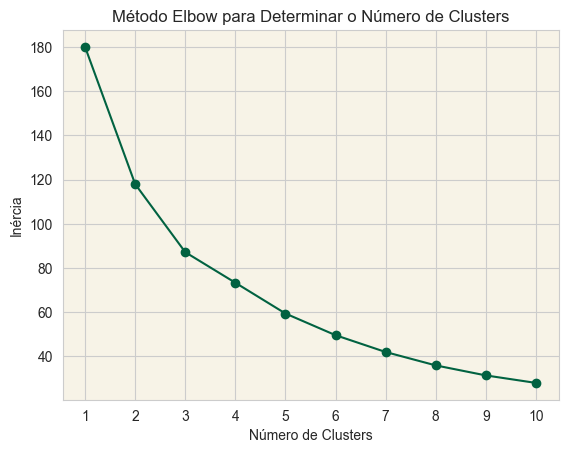

In [32]:
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(users_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o', color="#016241")
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xticks(range(1, 11))
plt.show()


# Model

In [33]:
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval

# Convertendo a coluna 'ingredientes' de string para uma lista de ingredientes
recipes['ingredientes'] = recipes['ingredientes'].apply(lambda x: literal_eval(x))

# Processamento dos dados
tfidf_vectorizer = TfidfVectorizer()
ingredientes_tfidf = tfidf_vectorizer.fit_transform(recipes['ingredientes'].apply(lambda x: ' '.join(x)))

# Inicializando NearestNeighbors
k = 6  # Número de vizinhos mais próximos a serem considerados, incluindo a própria receita
model_nn = NearestNeighbors(n_neighbors=k, metric='cosine')
model_nn.fit(ingredientes_tfidf)

# Treinamento do modelo GBDT com as receitas previamente avaliadas
df_avaliadas = recipes[recipes['feedback'].isin([1, 0])]
X_train = ingredientes_tfidf[df_avaliadas.index]
y_train = df_avaliadas['feedback']

model_gdbt = GradientBoostingClassifier(random_state=42)
model_gdbt.fit(X_train, y_train)

# Removendo a coluna 'feedback' após o treinamento do modelo
recipes.drop('feedback', axis=1, inplace=True)

# Função para recomendar receitas semelhantes e calcular a probabilidade de gostar usando GBDT
def recomendar_e_prever_probabilidade(receita_index):
    # Encontrando os vizinhos mais próximos da receita específica
    distances, indices = model_nn.kneighbors(ingredientes_tfidf[receita_index])
    
    # Retornando as informações das receitas recomendadas, excluindo a própria receita
    similar_indices = indices.flatten()[1:]
    receitas_recomendadas = recipes.iloc[similar_indices]
    
    # Calculando a probabilidade de gostar das receitas recomendadas
    X_test = ingredientes_tfidf[similar_indices]
    probabilidade_gostar = model_gdbt.predict_proba(X_test)[:, 1]
    
    # Adicionando a probabilidade como uma nova coluna ao DataFrame de receitas recomendadas
    receitas_recomendadas['probabilidade_gostar'] = probabilidade_gostar
    
    return receitas_recomendadas

# Exemplo de uso: recomendar receitas semelhantes à primeira receita no DataFrame (índice 0)
receita_a_verificar = 0  # Você pode mudar esse índice conforme necessário
receitas_com_probabilidade = recomendar_e_prever_probabilidade(receita_a_verificar)
receitas_com_probabilidade


/var/folders/1l/3bx9mf_x0pqf0ghbg1csygrw0000gn/T/ipykernel_44119/1543270629.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receitas_recomendadas['probabilidade_gostar'] = probabilidade_gostar


,receita,nacionalidade,ingredientes,categoria,ocasião,tempo,dificuldade,calorias,açúcar,sódio,proteínas,carboidratos,probabilidade_gostar
97,Salada Grega,Grega,"(Alface, Tomate, Pepino, Azeitona, Queijo feta)",Salada,Almoço,20,Fácil,180,4,150,5,15,0.782105
181,Tabule de Quinoa,Internacional,"(Quinoa, Tomate, Pepino, Salsinha, Hortelã)",Salada,Almoço,25,Fácil,180,3,120,5,20,0.313222
40,Salada de Quinoa,Internacional,"(Quinoa, Tomate, Pepino, Cebola, Salsa)",Salada,Almoço,20,Fácil,250,3,150,8,30,0.265395
13,Sanduíche de Atum,Internacional,"(Pão, Atum, Maionese, Alface, Tomate)",Peixes,Lanche,15,Fácil,250,3,200,15,30,0.874727
31,Sanduíche de Frango,Internacional,"(Pão, Peito de frango, Alface, Tomate, Maionese)",Aves,Lanche,20,Fácil,250,3,150,20,30,0.911518


Scores: [0.51494253 0.42298851 0.35402299 0.58237327 0.48214286]
Média: 0.47129403040415274
Desvio Padrão: 0.078035129675635


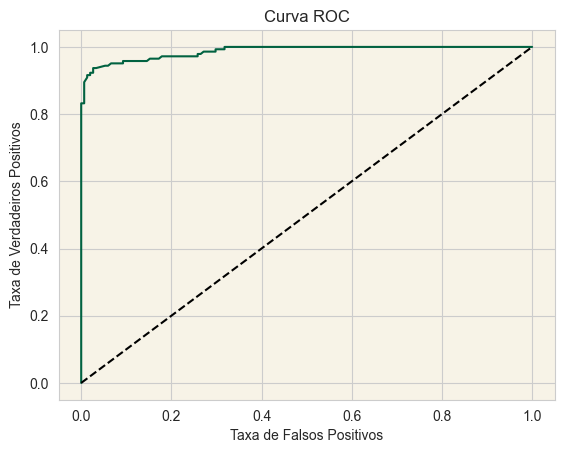

ROC AUC Score: 0.987194924281017


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gdbt, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Scores: {scores}')
print(f'Média: {scores.mean()}')
print(f'Desvio Padrão: {scores.std()}')

# curva roc auc
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model_gdbt.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

plt.plot(fpr, tpr, color="#016241")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

# roc auc score
roc_auc_score(y_train, y_pred_proba)
print(f'ROC AUC Score: {roc_auc_score(y_train, y_pred_proba)}')
